# Oficinas en Venta en Bogotá

Por: Viviana Sarmiento


In [110]:
import re
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt


La url principal de donde se extraerán los datos es https://www.fincaraiz.com.co/oficinas/venta/bogota/?ad=30| (main_start).

La información está contenida en varias páginas (pages=hace referencia a la página donde está ubicada la información)

Conforme vamos pasando de una página a otra, la url va cambiando siguiendo un patrón (main_end)

Entonces, la url de cada una de las oficinas en venta en Bogotá tiene la siguiente estructura: main_star+pages+main_end

In [32]:
main_start="https://www.fincaraiz.com.co/oficinas/venta/bogota/?ad=30|"

In [33]:
#páginas donde está ubicada la información de las oficinas
pages="1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 62 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111" 

In [34]:
#separamos las páginas para construir la url
list_num=pages.split()
type(list_num)
list_num

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '62',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111']

In [35]:
#patrón común con que cambia al final de la url
main_end="||||1||4|||67|3630001||||||||||||||||1|||1||griddate%20desc||||||"

In [36]:
#construimos una lista vacía que contenga la url de cada página donde se encuentra la información 
pag_url = []
for num_page in list_num:  
    pag_url.append( main_start+ num_page+main_end)

len(pag_url)

111

# Pasos:

1. Otener el html de cada una de las páginas, esto se hace con requests.get
2. Etructurar datos a partir de archivos HTML. Con beautiful soup
3. Extraer los links de cada una de las páginas
4. Extraer los links de cada oficina contenida en cada una de las páginas

# Primer loop


Obtenemos el html de cada una de las páginas. 
La lista pag_html va a contener los html de cada una de las páginas

In [41]:

pag_html=[]
for i in pag_url:
    html=requests.get(i).text
    pag_html.append(html)

In [42]:
#prueba de que la lista pag_html contiene todas las páginas donde está la información..
len(pag_html)

111

# Segundo loop:
    
    Encontrar los links HTML que me lleven al detalle de cada oficina
    
    El resultado será una lista de links de cada paginación

In [43]:
#crear una lista vacía que al final contenga los links html que lleven al detalle de cada oficina
sufijo_cadaoficina=[]
for n in pag_html:
    #estructurar los datos de cada página
    soup = BeautifulSoup(n, "lxml")
    #obtener todos los links de cada página
    links_pag_html = soup.find_all('a')
    #obtener los links de interés de cada página. En este caso, los que nos llevan al detalle de cada oficina
    link_cada_oficina=re.findall('/oficina-en-venta/bogota/\w+-\w+-\d+.aspx', str(links_pag_html))
    #pegar en la lista vacíalos links de cada oficina en cada una de las páginas
    sufijo_cadaoficina.extend(link_cada_oficina)

In [44]:
links_pag_html

[<a class="sm-fincaraiz-logo left img_print" href="/">
 <div class="compound-logo"></div>
 </a>,
 <a class="vinculo" href="/client/Client.aspx" title="Gestión personal">Regístrate <i class="fa fa-sort-down" style="display:none"></i></a>,
 <a class="vinculo" href="/client/Client.aspx" title="Gestión personal">Ingresa <i class="fa fa-sort-down" style="display:none"></i></a>,
 <a class="button_resaltadoProm" href="/anuncios-clasificados-gratis-publicar-inmueble.aspx" id="btnPriceAlert" onclick="return trackingClick(utag_data.event_name + ' - Boton Publicar','SpecificTracking')" title="Publique su inmueble">Publica GRATIS* en 1 paso
         </a>,
 <a id="lnkLoginFacebook" onclick="functionClickFacebook();">Ingresa con Facebook</a>,
 <a href="/">Inicio</a>,
 <a href="/oficinas/venta/cundinamarca/">Cundinamarca</a>,
 <a>Bogotá</a>,
 <a class="vinculoNeigh" href="/oficinas/venta/unicentro-bogota/bogota/" title="Oficinas en Venta en Unicentro Bogota - Bogotá">Unicentro Bogota </a>,
 <a class=

In [45]:
 link_cada_oficina

['/oficina-en-venta/bogota/teusaquillo_teusaquillo-det-4123553.aspx',
 '/oficina-en-venta/bogota/lago-det-4586945.aspx',
 '/oficina-en-venta/bogota/dorado-det-4313025.aspx',
 '/oficina-en-venta/bogota/chico-det-3511746.aspx',
 '/oficina-en-venta/bogota/tierra_linda-det-4582798.aspx',
 '/oficina-en-venta/bogota/carolina-det-2529444.aspx',
 '/oficina-en-venta/bogota/salitre_nor_occidental-det-2441787.aspx',
 '/oficina-en-venta/bogota/santa_barbara_oriental-det-2407779.aspx',
 '/oficina-en-venta/bogota/chico-det-2407606.aspx',
 '/oficina-en-venta/bogota/santa_barbara-det-2405073.aspx',
 '/oficina-en-venta/bogota/bosque_pinos-det-2402025.aspx',
 '/oficina-en-venta/bogota/dorado-det-4344906.aspx',
 '/oficina-en-venta/bogota/pasadena-det-2399862.aspx',
 '/oficina-en-venta/bogota/barrancas-det-1673035.aspx',
 '/oficina-en-venta/bogota/dorado-det-4344904.aspx',
 '/oficina-en-venta/bogota/zona_norte-det-1660571.aspx',
 '/oficina-en-venta/bogota/barrancas-det-2185003.aspx',
 '/oficina-en-venta/b

In [46]:
len(link_cada_oficina)

25

In [47]:
sufijo_cadaoficina

['/oficina-en-venta/bogota/santa_barbara_occidental-det-4595565.aspx',
 '/oficina-en-venta/bogota/lago-det-4586945.aspx',
 '/oficina-en-venta/bogota/chico_norte-det-4509035.aspx',
 '/oficina-en-venta/bogota/tierra_linda-det-4582798.aspx',
 '/oficina-en-venta/bogota/alamos_norte-det-3946183.aspx',
 '/oficina-en-venta/bogota/candelaria-det-4599886.aspx',
 '/oficina-en-venta/bogota/santa_barbara_oriental-det-3219686.aspx',
 '/oficina-en-venta/bogota/zona_norte-det-4599050.aspx',
 '/oficina-en-venta/bogota/belmira-det-4551673.aspx',
 '/oficina-en-venta/bogota/santa_ana_occidental-det-4597461.aspx',
 '/oficina-en-venta/bogota/normandia-det-4421974.aspx',
 '/oficina-en-venta/bogota/chico-det-4556953.aspx',
 '/oficina-en-venta/bogota/alhambra-det-4597143.aspx',
 '/oficina-en-venta/bogota/alamos_norte-det-3953231.aspx',
 '/oficina-en-venta/bogota/chico_reservado-det-4545452.aspx',
 '/oficina-en-venta/bogota/santa_barbara_alta-det-4479978.aspx',
 '/oficina-en-venta/bogota/alamos_norte-det-39532

In [48]:
#validar el número de oficinas en venta en todas las páginas
len(sufijo_cadaoficina)

4123

# Tercer loop:
    
    Construir la url completa de cada oficina, luego extraer el HTML y con regex encontrar la info que quiero

In [49]:
url_cada_oficina = []
prefix = 'https://www.fincaraiz.com.co'
for suffix in  sufijo_cadaoficina:  
    url_cada_oficina.append(prefix + suffix)

In [50]:
url_cada_oficina

['https://www.fincaraiz.com.co/oficina-en-venta/bogota/santa_barbara_occidental-det-4595565.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/lago-det-4586945.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/chico_norte-det-4509035.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/tierra_linda-det-4582798.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/alamos_norte-det-3946183.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/candelaria-det-4599886.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/santa_barbara_oriental-det-3219686.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/zona_norte-det-4599050.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/belmira-det-4551673.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/santa_ana_occidental-det-4597461.aspx',
 'https://www.fincaraiz.com.co/oficina-en-venta/bogota/normandia-det-4421974.aspx',
 'https://www.fincaraiz.com.co/ofi

In [51]:
len(url_cada_oficina)

4123

Como ya tenemos la url de cada una de las oficinas, en paso a seguir es obtener el html de cada una de las url

In [57]:
oficinai_html=[]
for i in url_cada_oficina:
    htmli = requests.get(i).text
    oficinai_html.append(htmli)

In [58]:
len(oficinai_html)

4123

In [59]:
type(oficinai_html)

list

In [60]:
#convertir la lista de los html de cada una de las oficinas en venta en un string para hacer regex
string_oficinai_html=str(oficinai_html)

In [ ]:
type(string_oficinai_html)

In [61]:
import re
noespacios_string_oficinai_html=re.sub("  +", " ",string_oficinai_html)

In [62]:
zona=re.findall('"region_level3":"(\w+\s\w+)', noespacios_string_oficinai_html)
len(zona)

4037

In [63]:
valor_admin=re.findall(' "AdministrationPrice" : "(\d+)', noespacios_string_oficinai_html)
len(valor_admin)

4123

In [64]:
precio_venta=re.findall('"price":"(\d+)', noespacios_string_oficinai_html)
len(precio_venta)

4123

In [65]:
edad=re.findall('"Ages" : "(\d+\s\w\s\d+)', noespacios_string_oficinai_html)
len(edad)

2632

In [66]:
estrato=re.findall('"stratum":"(\d+)',  noespacios_string_oficinai_html)
len(estrato)

4006

In [67]:
area=re.findall('Área:(\s\d+.\d+)',noespacios_string_oficinai_html)
len(area)

3757

In [68]:
pisos_no=re.findall('"floor_number":"(\d+)', noespacios_string_oficinai_html)
len(pisos_no)

2020

In [69]:
parquead=re.findall('"num_parking_spaces":"(\d+)', noespacios_string_oficinai_html)
len(parquead)

2428

In [70]:
condition=re.findall('"Condition" : "(\w+)', noespacios_string_oficinai_html)
len(condition)

2939

In [71]:
bath=re.findall('Baños:\s(\d+)',noespacios_string_oficinai_html)
len(bath)

2400

In [74]:
oficinai_html

zonas = []
valor_admins = []
precio_ventas = []
edads = []
estratos = [] 
areas = []
pisos_nos= [] 
parqueads = []
conditions = []
baths = []


for url in oficinai_html:
    zona1=[re.findall('"region_level3":"(\w+\s\w+)', str(url))]
    valor_admin1=[re.findall(' "AdministrationPrice" : "(\d+)', str(url))]
    precio_venta1=[re.findall('"price":"(\d+)', str(url))]
    edad1=[re.findall('"Ages" : "(\d+\s\w\s\d+)', str(url))]
    estrato1=[re.findall('"stratum":"(\d+)', str(url))]
    area1=[re.findall('Área:(\s\d+.\d+)', str(url))]
    pisos_no1=[re.findall('"floor_number":"(\d+)', str(url))]
    parquead1=[re.findall('"num_parking_spaces":"(\d+)', str(url))]
    condition1=[re.findall('"Condition" : "(\w+)', str(url))]
    bath1= [re.findall ('Baños:\s(\d+)', str(url))]
    zonas = zonas + zona1
    valor_admins = valor_admins +valor_admin1
    precio_ventas = precio_ventas +precio_venta1
    edads = edads + edad1
    estratos = estratos +estrato1
    areas = areas + area1
    pisos_nos = pisos_nos + pisos_no1
    parqueads = parqueads + parquead1
    conditions = conditions + condition1
    baths = baths + bath1
                       

In [80]:
db = {"Zona" : zonas, "Valor Administración" : valor_admins , "Precio Venta" : precio_ventas, "Antiguedad" : edads, \
      "Estrato": estratos, "M2" : areas, "No. Pisos" : pisos_nos, "No. Parqueaderos" : parqueads, "Estado" : conditions,\
      "No. Baños" : baths }

In [81]:
database = pd.DataFrame(db)
database

,Zona,Valor Administración,Precio Venta,Antiguedad,Estrato,M2,No. Pisos,No. Parqueaderos,Estado,No. Baños
0,[Zona Norte],[0],[1600000000],[16 a 30],[6],"[ 286,00]",[1],[2],[Excelente],[4]
1,[Zona Norte],[300000],[210000000],[9 a 15],[5],"[ 34,00]",[5],[],[Excelente],[]
2,[Zona Norte],[0],[225000000],[16 a 30],[4],"[ 37,50]",[],[1],[Excelente],[1]
3,[Zona Noroccidente],[0],[1800000000],[],[4],"[ 387,00]",[1],[10],[Remodelar],[6]
4,[Zona Occidente],[0],[239631397],[],[4],[],[],[],[],[]
5,[Zona Centro],[220000],[120000000],[],[1],"[ 36,00]",[8],[],[Bueno],[2]
6,[Zona Norte],[400000],[280000000],[1 a 8],[5],"[ 43,00]",[2],[1],[Excelente],[1]
7,[Zona Norte],[225000],[120000000],[16 a 30],[5],"[ 23,00]",[5],[],[Excelente],[1]
8,[Zona Norte],[83600],[110000000],[],[5],"[ 12,00]",[3],[],[Excelente],[1]
9,[Zona Norte],[0],[4500000000],[9 a 15],[6],"[ 550,00]",[],[4],[Excelente],[5]


In [82]:
database.to_excel("Base_Venta_Oficinas.xlsx")

In [99]:
file = pd.read_excel('Base_Venta_Oficinas.xlsx')
df = pd.DataFrame(file)
df

,ID,Zona,Valor Administración,Precio Venta,Antiguedad,Estrato,M2,No. Pisos,No. Parqueaderos,Estado,No. Baños
0,0,Zona Norte,0,1600000000,16 a 30,6.0,286,1.0,2.0,Excelente,4.0
1,1,Zona Norte,300000,210000000,9 a 15,5.0,34,5.0,NaN,Excelente,NaN
2,2,Zona Norte,0,225000000,16 a 30,4.0,37.5,NaN,1.0,Excelente,1.0
3,3,Zona Noroccidente,0,1800000000,NaN,4.0,387,1.0,10.0,Remodelar,6.0
4,4,Zona Occidente,0,239631397,NaN,4.0,NaN,NaN,NaN,NaN,NaN
5,5,Zona Centro,220000,120000000,NaN,1.0,36,8.0,NaN,Bueno,2.0
6,6,Zona Norte,400000,280000000,1 a 8,5.0,43,2.0,1.0,Excelente,1.0
7,7,Zona Norte,225000,120000000,16 a 30,5.0,23,5.0,NaN,Excelente,1.0
8,8,Zona Norte,83600,110000000,NaN,5.0,12,3.0,NaN,Excelente,1.0
9,9,Zona Norte,0,4500000000,9 a 15,6.0,550,NaN,4.0,Excelente,5.0


In [100]:
descriptivas=df.describe()
descriptivas

,ID,Valor Administración,Precio Venta,Estrato,No. Pisos,No. Parqueaderos,No. Baños
count,4123.000000,4.123000e+03,4.123000e+03,4006.000000,2020.000000,2428.000000,2384.000000
mean,2061.000000,1.370399e+06,2.014121e+09,4.603095,4.338614,2.593904,2.514681
std,1190.351909,2.423910e+07,1.743113e+10,1.128556,2.836156,1.942052,2.433633
min,0.000000,0.000000e+00,1.000000e+06,1.000000,1.000000,1.000000,1.000000
25%,1030.500000,0.000000e+00,3.000000e+08,4.000000,2.000000,1.000000,1.000000
50%,2061.000000,2.600000e+05,7.000000e+08,5.000000,4.000000,2.000000,2.000000
75%,3091.500000,7.765000e+05,1.563300e+09,6.000000,6.000000,3.000000,3.000000
max,4122.000000,1.065000e+09,7.800000e+11,6.000000,16.000000,10.000000,30.000000


In [151]:
precioventa_zona=df.groupby(['Zona'])[['Precio Venta']].median().sort_values(by='Precio Venta')
precioventa_zona

,Precio Venta
Zona,
Zona Centro,337500000
Zona Occidente,575000000
Zona Chapinero,650000000
Zona Sur,735000000
Zona Norte,820000000
Zona Noroccidente,876519000


In [1]:
precioventa_zona.plot(kind='bar',color='m',y='Precio Venta', legend=None)

NameError: name 'precioventa_zona' is not defined

In [153]:
valoradmin_zona=df.groupby(['Zona'])[['Valor Administración']].median().sort_values(by='Valor Administración')
valoradmin_zona

,Valor Administración
Zona,
Zona Occidente,0
Zona Sur,0
Zona Noroccidente,125000
Zona Centro,185000
Zona Chapinero,293000
Zona Norte,484000


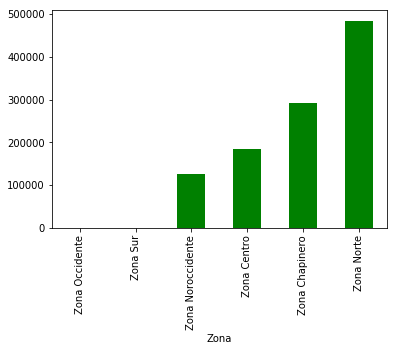

In [155]:
valoradmin_zona.plot(kind='bar',color='g',legend=None)

In [157]:
Estrato_zona=df.groupby(['Zona'])[['Estrato']].median().sort_values(by='Estrato')
Estrato_zona

,Estrato
Zona,
Zona Centro,3.0
Zona Sur,3.0
Zona Chapinero,4.0
Zona Noroccidente,4.0
Zona Occidente,4.0
Zona Norte,5.0


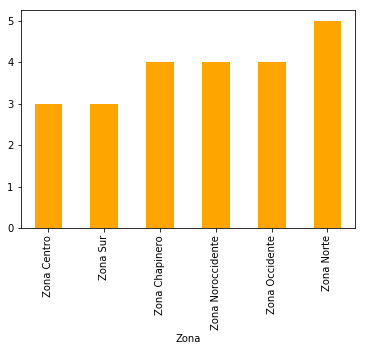

In [168]:
Estrato_zona.plot(kind='bar',color='orange',legend=None)

In [180]:
antia_zona=df.groupby(['Antiguedad'])[['Precio Venta']].median().sort_values(by='Antiguedad')

In [181]:
antia_zona

,Precio Venta
Antiguedad,
1 a 8,875081009.5
16 a 30,480000000.0
9 a 15,830000000.0


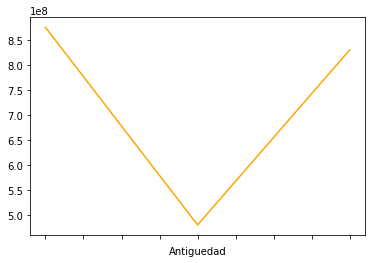

In [179]:
antia_zona.plot(kind='line',color='orange',legend=None)